In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
#%matplotlib notebook

# HP model 

In [2]:
nmin = 200
nmax = 400

data = np.zeros(( nmax-nmin+1, 17, 11 ))

 
for i in range(17):
    filename = "HP_simulations/Main_Simulations/counts_hp_moresteps_"+str(i/10)+"00000_higher_hpc.txt"
    #currentdata = np.genfromtxt(file, max_rows = 6, missing_values = "" )
    filedata = np.loadtxt(filename, skiprows=9) 
    for N in range(nmin, nmax+1):
        currentdata=filedata[filedata[:,0]==N] 
        #currentdata[:,1]= currentdata[:,1]/(N+1)  
        
 
        data[N-nmin, i, 0] = np.sum(currentdata[:,1]/(N+1)*currentdata[:,2])/np.sum(currentdata[:,2])
 
        data[N-nmin, i, 2] = np.sum(currentdata[:,1]*currentdata[:,1]*currentdata[:,2]/(N+1)/(N+1))/np.sum(currentdata[:,2])
    
        data[N-nmin, i, 4] = np.sum((currentdata[:,1]/(N+1))**4*currentdata[:,2])/np.sum(currentdata[:,2])
 
        data[N-nmin, i, 6] = 1.0 - data[N-nmin, i, 2]/3.0/data[N-nmin, i, 0]/data[N-nmin, i, 0]
 
        data[N-nmin, i, 8] = 1.0 - data[N-nmin, i, 4]/3.0/data[N-nmin, i, 2]/data[N-nmin, i, 2]
 
        meanm =  np.sum(currentdata[:,1]*currentdata[:,2])/np.sum(currentdata[:,2])
        meanmsq =  np.sum(currentdata[:,1]*currentdata[:,1]*currentdata[:,2])/np.sum(currentdata[:,2])
        #data[N-nmin, i-21, 10] = (100+i)/100.0*(100+i)/100.0 * (meanmsq - meanm*meanm)
        
        data[N-nmin, i, 10] = (meanmsq - meanm*meanm)
    
        #data[N-nmin, i-21, 10] = data[N-nmin, i-21, 10]/N
        
        #print(N, end = " ")
    #print(i, end = " ")

Text(0.5, 1.0, ' ')

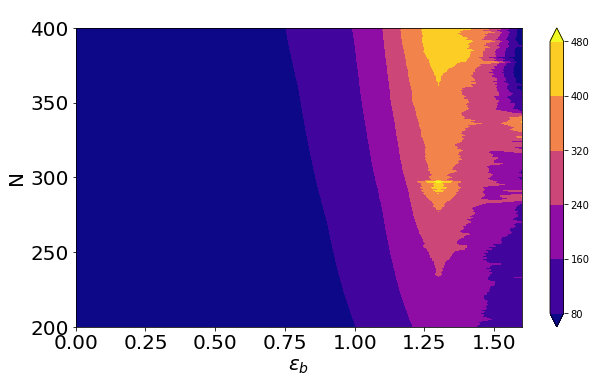

In [3]:
#heat capacity 

x = np.arange(nmin, nmax+1)
y = np.arange(0, 17)/10.0
X, Y = np.meshgrid(x, y)


plt.figure(figsize=(10,5.5))
plt.contourf(y, x,  data[:,:,10] ,extend='both', cmap = "plasma")
plt.xlabel(r"$\epsilon_b$", fontsize=20)
plt.ylabel("N", fontsize=20)
plt.tick_params(axis='x', labelsize=20) 
plt.tick_params(axis='y', labelsize=20) 
plt.colorbar()
plt.title(' ', fontsize=20)

#plt.savefig("/home/kamilla/Documents/GM1/almostc.png")

### Local

In [4]:
nmin = 200
nmax = 400

data = np.zeros(( nmax-nmin+1, 17, 11 ))


for i in range(21, 38):
    filename = "HP_simulations/Simulations_near_theta_point/counts_hp_moresteps_1."+str(i)+"0000_higher_hpc.txt"
    #currentdata = np.genfromtxt(file, max_rows = 6, missing_values = "" )
    filedata = np.loadtxt(filename, skiprows=5) 
    for N in range(nmin, nmax+1):
        currentdata=filedata[filedata[:,0]==N] 
        #currentdata[:,1]= currentdata[:,1]/(N+1)  
        
 
        data[N-nmin, i-21, 0] = np.sum(currentdata[:,1]/(N+1)*currentdata[:,2])/np.sum(currentdata[:,2])
 
        data[N-nmin, i-21, 2] = np.sum(currentdata[:,1]*currentdata[:,1]*currentdata[:,2]/(N+1)/(N+1))/np.sum(currentdata[:,2])
    
        data[N-nmin, i-21, 4] = np.sum((currentdata[:,1]/(N+1))**4*currentdata[:,2])/np.sum(currentdata[:,2])
 
        data[N-nmin, i-21, 6] = 1.0 - data[N-nmin, i-21, 2]/3.0/data[N-nmin, i-21, 0]/data[N-nmin, i-21, 0]
 
        data[N-nmin, i-21, 8] = 1.0 - data[N-nmin, i-21, 4]/3.0/data[N-nmin, i-21, 2]/data[N-nmin, i-21, 2]
 
        meanm =  np.sum(currentdata[:,1]*currentdata[:,2])/np.sum(currentdata[:,2])
        meanmsq =  np.sum(currentdata[:,1]*currentdata[:,1]*currentdata[:,2])/np.sum(currentdata[:,2])
        #data[N-nmin, i-21, 10] = (100+i)/100.0*(100+i)/100.0 * (meanmsq - meanm*meanm)
        
        data[N-nmin, i-21, 10] = (meanmsq - meanm*meanm)
    
        #data[N-nmin, i-21, 10] = data[N-nmin, i-21, 10]/N
        
        #print(N, end = " ")
    print(i, end = " ")
    
 

21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 

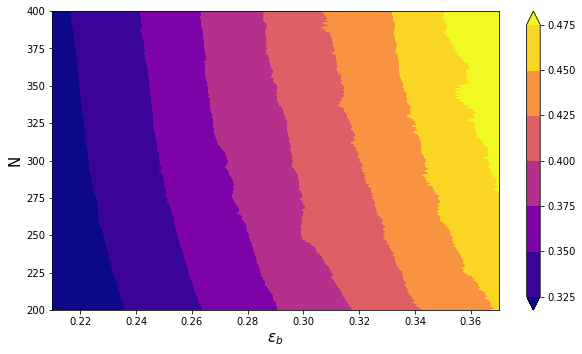

In [5]:
#mean energy for fixed length 

x = np.arange(nmin, nmax+1)
y = np.arange(21, 38)/100
X, Y = np.meshgrid(x, y)


plt.figure(figsize=(10,5.5))
plt.contourf(y, x,  data[:,:,0] ,extend='both', cmap = "plasma")
plt.xlabel(r"$\epsilon_b$", fontsize=15)
plt.ylabel("N", fontsize=15)

plt.colorbar()

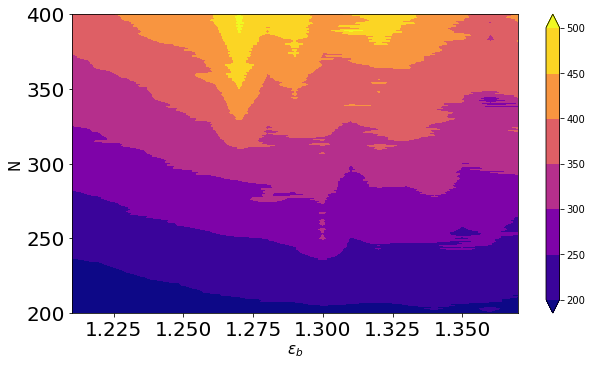

In [6]:
#heat capacity 
x = np.arange(nmin, nmax+1)
y = (np.arange(21, 38) + 100)/100
X, Y = np.meshgrid(x, y)


plt.figure(figsize=(10,5.5))
plt.contourf(y, x,  data[:,:,10] ,extend='both', cmap = "plasma")
plt.xlabel(r"$\epsilon_b$", fontsize=15)
plt.ylabel("N", fontsize=15)
plt.tick_params(axis='x', labelsize=20) 
plt.tick_params(axis='y', labelsize=20) 
plt.colorbar()
#plt.savefig("/home/kamilla/Documents/GM1/almostc1.png")



In [8]:
nmin = 200
nmax = 500

data = np.zeros(( nmax-nmin+1, 17, 11 ))


for i in range(21, 38):
    filename = "HP_simulations/Simulations_near_theta_point/counts_mags_hp_moresteps_1."+str(i)+"0000_higher_hpc.txt"
    #currentdata = np.genfromtxt(file, max_rows = 6, missing_values = "" )
    filedata = np.loadtxt(filename, skiprows=5) 
    for N in range(nmin, nmax+1):
        currentdata=filedata[filedata[:,0]==N] 
        #currentdata[:,1]= currentdata[:,1]/(N+1)        
 
        data[N-nmin, i-21, 0] = np.sum(currentdata[:,1]/(N+1)*currentdata[:,2])/np.sum(currentdata[:,2])
 
        data[N-nmin, i-21, 2] = np.sum(currentdata[:,1]*currentdata[:,1]*currentdata[:,2]/(N+1)/(N+1))/np.sum(currentdata[:,2])
    
        data[N-nmin, i-21, 4] = np.sum((currentdata[:,1]/(N+1))**4*currentdata[:,2])/np.sum(currentdata[:,2])

        data[N-nmin, i-21, 6] = 1.0 - data[N-nmin, i-21, 2]/3.0/data[N-nmin, i-21, 0]/data[N-nmin, i-21, 0]
 
        data[N-nmin, i-21, 8] = 1.0 - data[N-nmin, i-21, 4]/3.0/data[N-nmin, i-21, 2]/data[N-nmin, i-21, 2]
 
        meanm =  np.sum(currentdata[:,1]*currentdata[:,2])/np.sum(currentdata[:,2])
        meanmsq =  np.sum(currentdata[:,1]*currentdata[:,1]*currentdata[:,2])/np.sum(currentdata[:,2])
        data[N-nmin, i-21, 10] = (100+i)/100.0 * (meanmsq - meanm*meanm)
    
        #data[N-nmin, i-21, 10] = (100+i)/100.0*(100+i)/100.0 * (data[N-nmin, i-21, 2]  - data[N-nmin, i-21, 0]*data[N-nmin, i-21, 0])
        
        #data[N-nmin, i-21, 10] = data[N-nmin, i-21, 10]/N
        
        #print(N, end = " ")
    print(i, end = " ")
   

21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 

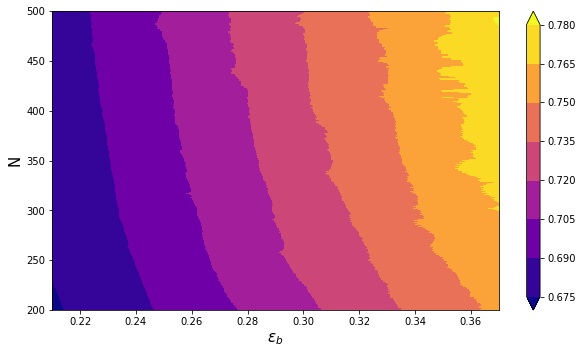

In [9]:
x = np.arange(nmin, nmax+1)
y = np.arange(21, 38)/100
X, Y = np.meshgrid(x, y)


plt.figure(figsize=(10,5.5))
plt.contourf(y, x,  data[:,:,0] ,extend='both', cmap = "plasma")
plt.xlabel(r"$\epsilon_b$", fontsize=15)
plt.ylabel("N", fontsize=15)

plt.colorbar()

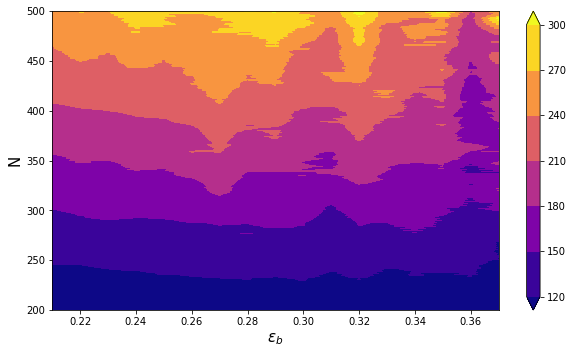

In [10]:
#heat capacity 

x = np.arange(nmin, nmax+1)
y = np.arange(21, 38)/100
X, Y = np.meshgrid(x, y)


plt.figure(figsize=(10,5.5))
plt.contourf(y, x,  data[:,:,10] ,extend='both', cmap = "plasma")
plt.xlabel(r"$\epsilon_b$", fontsize=15)
plt.ylabel("N", fontsize=15)

plt.colorbar()

Mean H number 

In [11]:
#similar to magnetization 

nmin = 300
nmax = 350

data = np.zeros(( nmax-nmin+1, 17, 11 ))


for i in range(21, 38):
    filename = "HP_simulations/Simulations_near_theta_point/counts_mags_hp_moresteps_1."+str(i)+"0000_higher_hpc.txt"
    #currentdata = np.genfromtxt(file, max_rows = 6, missing_values = "" )
    filedata = np.loadtxt(filename, skiprows=5) 
    for N in range(nmin, nmax+1):
        currentdata=filedata[filedata[:,0]==N] 
        #currentdata[:,1]= currentdata[:,1]/(N+1)        
 
        data[N-nmin, i-21, 0] = np.sum(currentdata[:,1]/(N+1)*currentdata[:,2])/np.sum(currentdata[:,2])
 
        data[N-nmin, i-21, 2] = np.sum(currentdata[:,1]*currentdata[:,1]*currentdata[:,2]/(N+1)/(N+1))/np.sum(currentdata[:,2])
    
        data[N-nmin, i-21, 4] = np.sum((currentdata[:,1]/(N+1))**4*currentdata[:,2])/np.sum(currentdata[:,2])
 
        data[N-nmin, i-21, 6] = 1.0 - data[N-nmin, i-21, 2]/3.0/data[N-nmin, i-21, 0]/data[N-nmin, i-21, 0]
 
        data[N-nmin, i-21, 8] = 1.0 - data[N-nmin, i-21, 4]/3.0/data[N-nmin, i-21, 2]/data[N-nmin, i-21, 2]
 
        meanm =  np.sum(currentdata[:,1]*currentdata[:,2])/np.sum(currentdata[:,2])
        meanmsq =  np.sum(currentdata[:,1]*currentdata[:,1]*currentdata[:,2])/np.sum(currentdata[:,2])
        data[N-nmin, i-21, 10] = (100+i)/100.0 * (meanmsq - meanm*meanm)
    
        #data[N-nmin, i-21, 10] = (100+i)/100.0*(100+i)/100.0 * (data[N-nmin, i-21, 2]  - data[N-nmin, i-21, 0]*data[N-nmin, i-21, 0])
        
        #data[N-nmin, i-21, 10] = data[N-nmin, i-21, 10]/N
        
        #print(N, end = " ")
    print(i, end = " ")

21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 

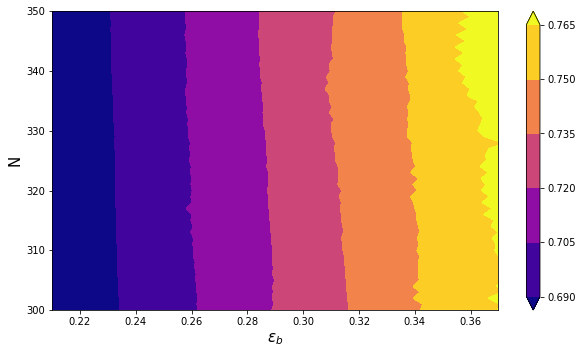

In [12]:
x = np.arange(nmin, nmax+1)
y = np.arange(21, 38)/100
X, Y = np.meshgrid(x, y)


plt.figure(figsize=(10,5.5))
plt.contourf(y, x,  data[:,:,0] ,extend='both', cmap = "plasma")
plt.xlabel(r"$\epsilon_b$", fontsize=15)
plt.ylabel("N", fontsize=15)

plt.colorbar()

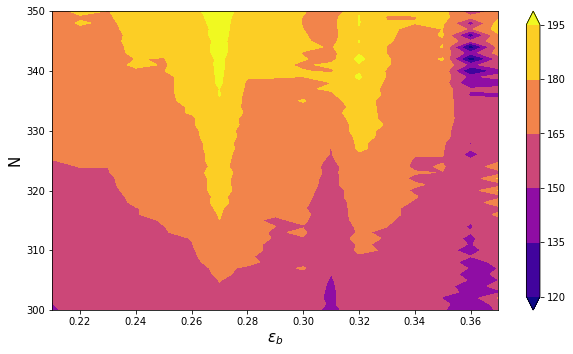

In [13]:
#like central m^2

x = np.arange(nmin, nmax+1)
y = np.arange(21, 38)/100
X, Y = np.meshgrid(x, y)


plt.figure(figsize=(10,5.5))
plt.contourf(y, x,  data[:,:,10] ,extend='both', cmap = "plasma")
plt.xlabel(r"$\epsilon_b$", fontsize=15)
plt.ylabel("N", fontsize=15)

plt.colorbar()



#plt.savefig("/home/kamilla/SAWs/Bachelor thesis/img/mean_mag.png")

Unlucky

In [21]:
nmin = 200
nmax = 300

data = np.zeros(( nmax-nmin+1, 17, 11 ))


for i in range(21, 38):
    filename = "HP_simulations/Simulations_near_theta_point/counts_hp_moresteps_1."+str(i)+"0000_higher_hpc.txt"
    #currentdata = np.genfromtxt(file, max_rows = 6, missing_values = "" )
    filedata = np.loadtxt(filename, skiprows=5) 
    for N in range(nmin, nmax+1):
        currentdata=filedata[filedata[:,0]==N] 
        #currentdata[:,1]= currentdata[:,1]/(N+1)        
 
        data[N-nmin, i-21, 0] = np.sum(currentdata[:,1]/(N+1)*currentdata[:,2])/np.sum(currentdata[:,2])
 
        data[N-nmin, i-21, 2] = np.sum(currentdata[:,1]*currentdata[:,1]*currentdata[:,2]/(N+1)/(N+1))/np.sum(currentdata[:,2])
    
        data[N-nmin, i-21, 4] = np.sum((currentdata[:,1]/(N+1))**4*currentdata[:,2])/np.sum(currentdata[:,2])
 
        data[N-nmin, i-21, 6] = 1.0 - data[N-nmin, i-21, 2]/3.0/data[N-nmin, i-21, 0]/data[N-nmin, i-21, 0]
 
        data[N-nmin, i-21, 8] = 1.0 - data[N-nmin, i-21, 4]/3.0/data[N-nmin, i-21, 2]/data[N-nmin, i-21, 2]
 
        meanm =  np.sum(currentdata[:,1]*currentdata[:,2])/np.sum(currentdata[:,2])
        meanmsq =  np.sum(currentdata[:,1]*currentdata[:,1]*currentdata[:,2])/np.sum(currentdata[:,2])
        data[N-nmin, i-21, 10] = (100+i)/100.0 * (meanmsq - meanm*meanm)
    
        #data[N-nmin, i-21, 10] = (100+i)/100.0*(100+i)/100.0 * (data[N-nmin, i-21, 2]  - data[N-nmin, i-21, 0]*data[N-nmin, i-21, 0])
        
        #data[N-nmin, i-21, 10] = data[N-nmin, i-21, 10]/N
        
 

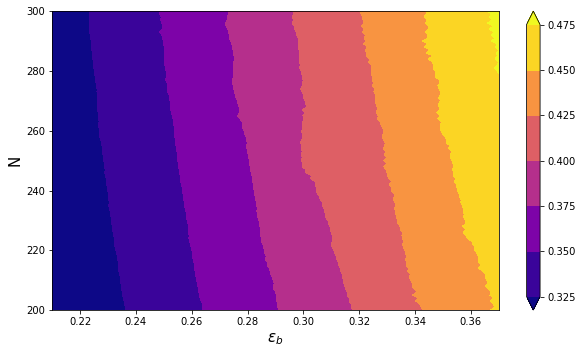

In [23]:
x = np.arange(nmin, nmax+1)
y = np.arange(21, 38)/100
X, Y = np.meshgrid(x, y)


plt.figure(figsize=(10,5.5))
plt.contourf(y, x,  data[:,:,0] ,extend='both', cmap = "plasma")
plt.xlabel(r"$\epsilon_b$", fontsize=15)
plt.ylabel("N", fontsize=15)

plt.colorbar()

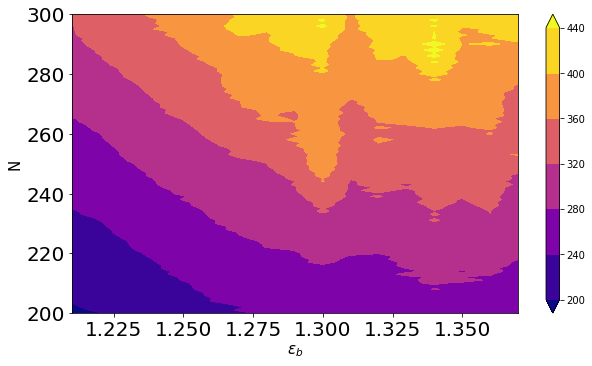

In [24]:
x = np.arange(nmin, nmax+1)
y = ( np.arange(21, 38) + 100 )/100
X, Y = np.meshgrid(x, y)


plt.figure(figsize=(10,5.5))
plt.contourf(y, x,  data[:,:,10] ,extend='both', cmap = "plasma")
plt.xlabel(r"$\epsilon_b$", fontsize=15)
plt.ylabel("N", fontsize=15)
plt.tick_params(axis='x', labelsize=20) 
plt.tick_params(axis='y', labelsize=20) 
plt.colorbar()

# Homopolymer 

In [7]:
nmin = 200
nmax = 400

data = np.zeros(( nmax-nmin+1, 10, 11 ))

 
for i in range(10):
    filename = "Homopolymer_simulations/Main_simulations/counts_isaw_moresteps_"+str(i/10)+"00000_higher_hpc.txt"
    #currentdata = np.genfromtxt(file, max_rows = 6, missing_values = "" )
    filedata = np.loadtxt(filename, skiprows=9) 
    for N in range(nmin, nmax+1):
        currentdata=filedata[filedata[:,0]==N] 
        #currentdata[:,1]= currentdata[:,1]/(N+1)  
        
 
        data[N-nmin, i, 0] = np.sum(currentdata[:,1]/(N+1)*currentdata[:,2])/np.sum(currentdata[:,2])
 
        data[N-nmin, i, 2] = np.sum(currentdata[:,1]*currentdata[:,1]*currentdata[:,2]/(N+1)/(N+1))/np.sum(currentdata[:,2])
    
        data[N-nmin, i, 4] = np.sum((currentdata[:,1]/(N+1))**4*currentdata[:,2])/np.sum(currentdata[:,2])
 
        data[N-nmin, i, 6] = 1.0 - data[N-nmin, i, 2]/3.0/data[N-nmin, i, 0]/data[N-nmin, i, 0]
 
        data[N-nmin, i, 8] = 1.0 - data[N-nmin, i, 4]/3.0/data[N-nmin, i, 2]/data[N-nmin, i, 2]
 
        meanm =  np.sum(currentdata[:,1]*currentdata[:,2])/np.sum(currentdata[:,2])
        meanmsq =  np.sum(currentdata[:,1]*currentdata[:,1]*currentdata[:,2])/np.sum(currentdata[:,2])
        #data[N-nmin, i-21, 10] = (100+i)/100.0*(100+i)/100.0 * (meanmsq - meanm*meanm)
        
        data[N-nmin, i, 10] = (meanmsq - meanm*meanm)*np.square(i/10)

Text(0.5, 1.0, ' ')

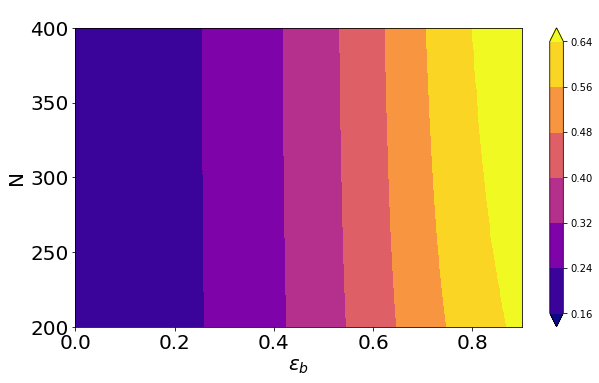

In [8]:
x = np.arange(nmin, nmax+1)
y = np.arange(0, 10)/10.0
X, Y = np.meshgrid(x, y)


plt.figure(figsize=(10,5.5))
plt.contourf(y, x,  data[:,:,0] ,extend='both', cmap = "plasma")
plt.xlabel(r"$\epsilon_b$", fontsize=20)
plt.ylabel("N", fontsize=20)
plt.tick_params(axis='x', labelsize=20) 
plt.tick_params(axis='y', labelsize=20) 
plt.colorbar()
plt.title(' ', fontsize=20)

Text(0.5, 1.0, ' ')

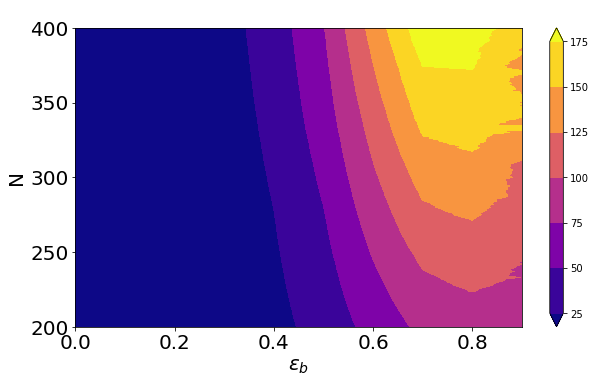

In [9]:
#heat capacity 

x = np.arange(nmin, nmax+1)
y = np.arange(0, 10)/10.0
X, Y = np.meshgrid(x, y)


plt.figure(figsize=(10,5.5))
plt.contourf(y, x,  data[:,:,10],extend='both', cmap = "plasma")
plt.xlabel(r"$\epsilon_b$", fontsize=20)
plt.ylabel("N", fontsize=20)
plt.tick_params(axis='x', labelsize=20) 
plt.tick_params(axis='y', labelsize=20) 
plt.colorbar()
plt.title(' ', fontsize=20)

Fine

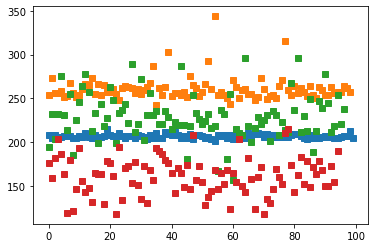

In [3]:
nmin = 200
nmax = 400

nplot = 16 
data = np.zeros(( nmax-nmin+1, nplot , 11 ))

#lengths = [100, 150, 200, 250, 300, 350, 400]

#lengths = [100, 150, 200, 250, 300 ]

lengths = [100, 150, 200, 250 ]

datas = np.zeros((len(lengths), nplot ))
errors = np.zeros((len(lengths), nplot ))
for i in range(nplot-4 ):
    
    filename = "/home/kamilla/saw/HP_simulations/Means_contacts/counts_and_contacts"+str(i/10)+"00000_higher_hpc.txt"
    
    filedata = np.loadtxt(filename, skiprows=2) 
    
    for l in range(len(lengths)):
        current = filedata[lengths[l]]
        datas[l, i] =  current[3] - current[1]*current[1]
        errors[l,i] = current[4]*current[4] + 2*current[2]*current[2]*current[1]
        errors[l,i] = np.sqrt(errors[l,i])
        
        
for i in range(nplot-4, nplot ):
    
    current_c = np.zeros((len(lengths), 100))
    
    for n_sims in range(50):
    
        filename = "/home/kamilla/saw/HP_simulations/Simulations_p/counts_and_contacts"+str(i/10)+"00000_"+str(n_sims)+"_higher_hpc.txt"
    
        filedata = np.loadtxt(filename, skiprows=2) 
    
        for l in range(len(lengths)):
            current = filedata[lengths[l]]
            current_c[l][n_sims] = current[3] - current[1]*current[1]
     
    #print(current_c[-1]<50)
    #plt.plot(current_c[-1], "o")
            
    #for l in range(len(lengths)):
        #datas[l, i] = np.mean(current_c[l,:])
        #errors[l,i] = np.std(current_c[l,:])

        
    for n_sims in range(50):
    
        filename = "/home/kamilla/saw/HP_simulations/Simulations_p1/counts_and_contacts"+str(i/10)+"00000_"+str(n_sims)+"_higher_hpc.txt"
    
        filedata = np.loadtxt(filename, skiprows=2)
        
        #rint(filename)
    
        for l in range(len(lengths)):
            current = filedata[lengths[l]]
            current_c[l][n_sims+50] = current[3] - current[1]*current[1]
            
     
    
    for l in range(len(lengths)):
        #no_too_values = current_c[l,:][current_c[l,:] ]
        nu = np.mean(current_c[l,:]) 
        mask1 = np.abs(current_c[l,:]- nu)/nu<0.35
        #print(mask1)
        datas[l, i] = np.mean(current_c[l,:][mask1])
        errors[l,i] = np.std(current_c[l,:][mask1])
        if(l==len(lengths)-1):
            plt.plot(current_c[l,:][mask1], "s")
#print(current_c) 
 
                                                                    

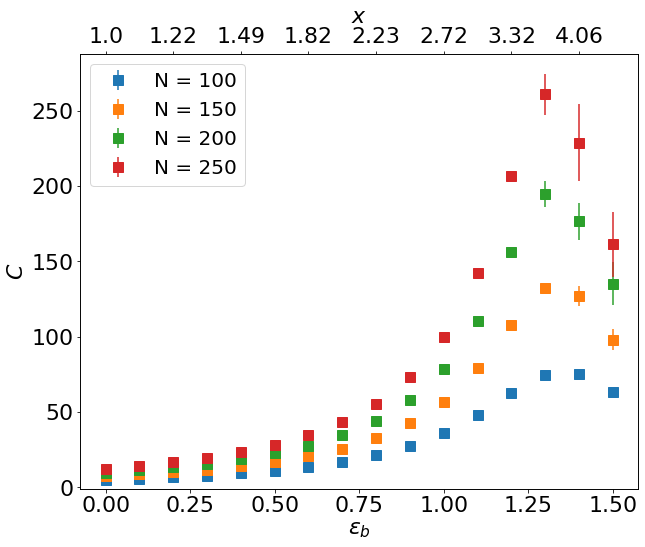

In [5]:

    
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

x = np.arange(nplot)/10
for l in range(len(lengths)):
    plt.errorbar(x, datas[l, :], yerr=errors[l,:], fmt="s", ms = 10, label = "N = " + str(lengths[l]))
    

 
plt.xlabel(r'$\epsilon_b$', fontsize = 22)
plt.ylabel(r"$ C  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-1)
  

plt.legend(loc="best", fontsize=20)
 
ax2 = ax.twiny() 
ax2.set_xlabel(r'$x$', fontsize=22)
ax2.set_xticks(np.arange(0,16,2)/10)
ax2.tick_params(axis='x', labelsize=22)
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels( np.round( np.exp(np.arange(0, nplot, 2)/10), 2) )

#plt.savefig("/home/kamilla/SAWs/Bachelor thesis/img/new_heat_c.png")
plt.savefig("/home/kamilla/SAW_paper_KF_1/img/new_heat_c1.png")

In [40]:
np.max(errors)

25.7284225056046

In [41]:
np.max(errors)

25.7284225056046

In [43]:
nmin = 200
nmax = 400

nplot = 16 
data = np.zeros(( nmax-nmin+1, nplot , 11 ))

#lengths = [100, 150, 200, 250, 300, 350, 400]

#lengths = [100, 150, 200, 250, 300 ]

lengths = np.arange(200, 400)
#print(lengths)

datas = np.zeros((len(lengths), nplot ))
errors = np.zeros((len(lengths), nplot ))
for i in range(nplot-4 ):
    
    filename = "/home/kamilla/saw/HP_simulations/Means_contacts/counts_and_contacts"+str(i/10)+"00000_higher_hpc.txt"
    
    filedata = np.loadtxt(filename, skiprows=2) 
    
    for l in range(len(lengths)):
        current = filedata[lengths[l]]
        datas[l, i] =  current[3] - current[1]*current[1]
        errors[l,i] = current[4]*current[4] + 2*current[2]*current[2]*current[1]
        errors[l,i] = np.sqrt(errors[l,i])
        
        
for i in range(nplot-4, nplot ):
    
    current_c = np.zeros((len(lengths), 100))
    
    for n_sims in range(50):
    
        filename = "/home/kamilla/saw/HP_simulations/Simulations_p/counts_and_contacts"+str(i/10)+"00000_"+str(n_sims)+"_higher_hpc.txt"
    
        filedata = np.loadtxt(filename, skiprows=2) 
    
        for l in range(len(lengths)):
            current = filedata[lengths[l]]
            current_c[l][n_sims] = current[3] - current[1]*current[1]
            
    for l in range(len(lengths)):
        datas[l, i] = np.mean(current_c[l,:])
        errors[l,i] = np.std(current_c[l,:])

    for n_sims in range(50):
    
        filename = "/home/kamilla/saw/HP_simulations/Simulations_p1/counts_and_contacts"+str(i/10)+"00000_"+str(n_sims)+"_higher_hpc.txt"
    
        filedata = np.loadtxt(filename, skiprows=2) 
    
        for l in range(len(lengths)):
            current = filedata[lengths[l]]
            current_c[l][n_sims+50] = current[3] - current[1]*current[1]
            
    for l in range(len(lengths)):
        datas[l, i] = np.mean(current_c[l,:])
        errors[l,i] = np.std(current_c[l,:])
#print(current_c) 
 

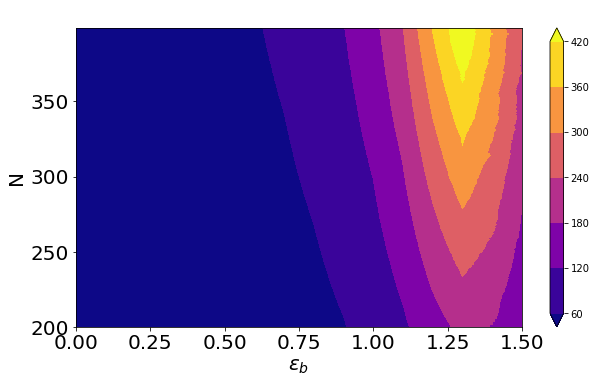

In [44]:
#x = np.arange(nmin, nmax+1)


x = lengths
y = np.arange(0, 16)/10.0
X, Y = np.meshgrid(x, y)


plt.figure(figsize=(10,5.5))
plt.contourf(y, x,  datas ,extend='both', cmap = "plasma")
plt.xlabel(r"$\epsilon_b$", fontsize=20)
plt.ylabel("N", fontsize=20)
plt.tick_params(axis='x', labelsize=20) 
plt.tick_params(axis='y', labelsize=20) 
plt.colorbar()
plt.title(' ', fontsize=20)


plt.savefig("/home/kamilla/SAW_paper_KF_1/img/almost_c_after.png")